In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [96]:
df=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [97]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [98]:
df=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [99]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### EDA Part

### checking the missing data or not

<AxesSubplot:>

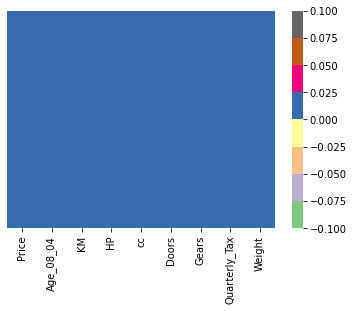

In [100]:
sns.heatmap(df.isnull(),cmap="Accent",yticklabels=False)#Here we see no any missing values present in the dataset

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [102]:
df[df.duplicated()]#one duplicated items, we remove this

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [103]:
df.shape

(1436, 9)

In [104]:
df_clean=df.drop_duplicates().reset_index(drop=True)
df_clean

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


### Multivariate plot

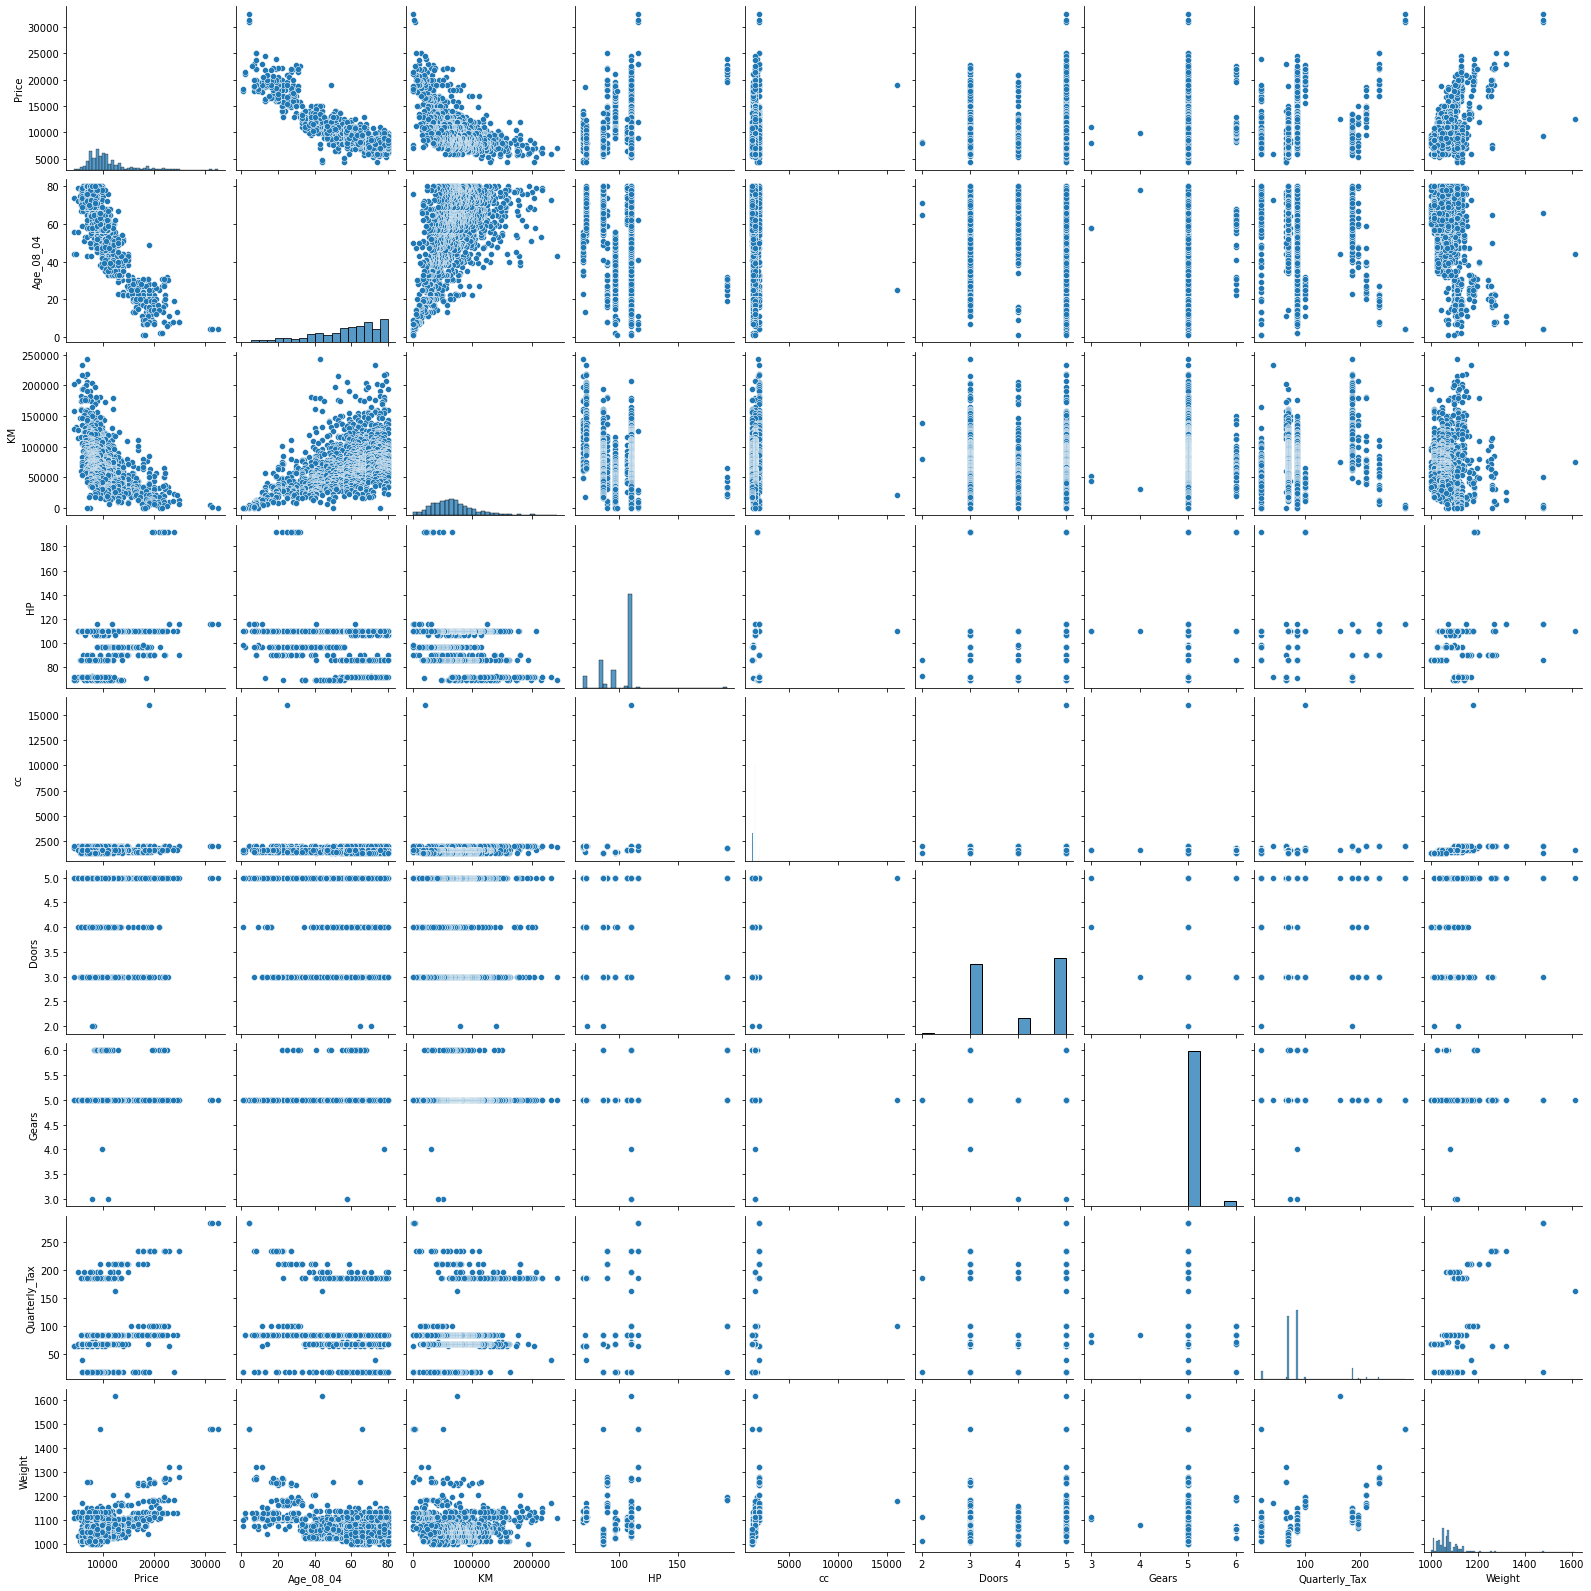

In [105]:
sns.pairplot(df_clean)

In [106]:
df_clean.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


### Correlation plot

<AxesSubplot:>

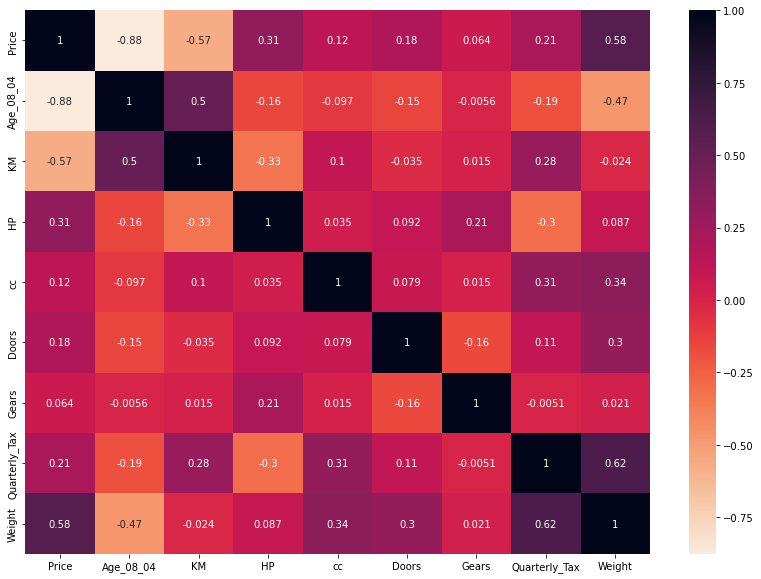

In [107]:
plt.figure(figsize=(14,10))
sns.heatmap(df_clean.corr(),cmap="rocket_r", annot=True)

#### Feature scaling to the dataset

In [108]:
def normal_scale(value):
    return((value-value.mean())/(value.std()))

In [109]:
df_clean=normal_scale(df_clean)
df_clean

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.770100,-1.776649,-0.575758,-0.767083,0.997765,-1.084065,-0.140426,3.002466,1.774345
1,0.839376,-1.776649,0.116433,-0.767083,0.997765,-1.084065,-0.140426,3.002466,1.774345
2,0.894797,-1.722779,-0.716458,-0.767083,0.997765,-1.084065,-0.140426,3.002466,1.774345
3,1.171903,-1.615040,-0.548711,-0.767083,0.997765,-1.084065,-0.140426,3.002466,1.774345
4,0.839376,-1.399561,-0.802105,-0.767083,0.997765,-1.084065,-0.140426,3.002466,1.870036
...,...,...,...,...,...,...,...,...,...
1430,-0.892534,0.701357,-1.281045,-1.034081,-0.651671,-1.084065,-0.140426,-0.439951,-0.904984
1431,0.034384,0.862966,-1.322228,-1.034081,-0.651671,-1.084065,-0.140426,-0.439951,-1.096364
1432,-0.615428,0.809097,-1.375147,-1.034081,-0.651671,-1.084065,-0.140426,-0.439951,-1.096364
1433,-0.961810,0.755227,-1.377815,-1.034081,-0.651671,-1.084065,-0.140426,-0.439951,-1.096364


### Box plot

<AxesSubplot:xlabel='Weight'>

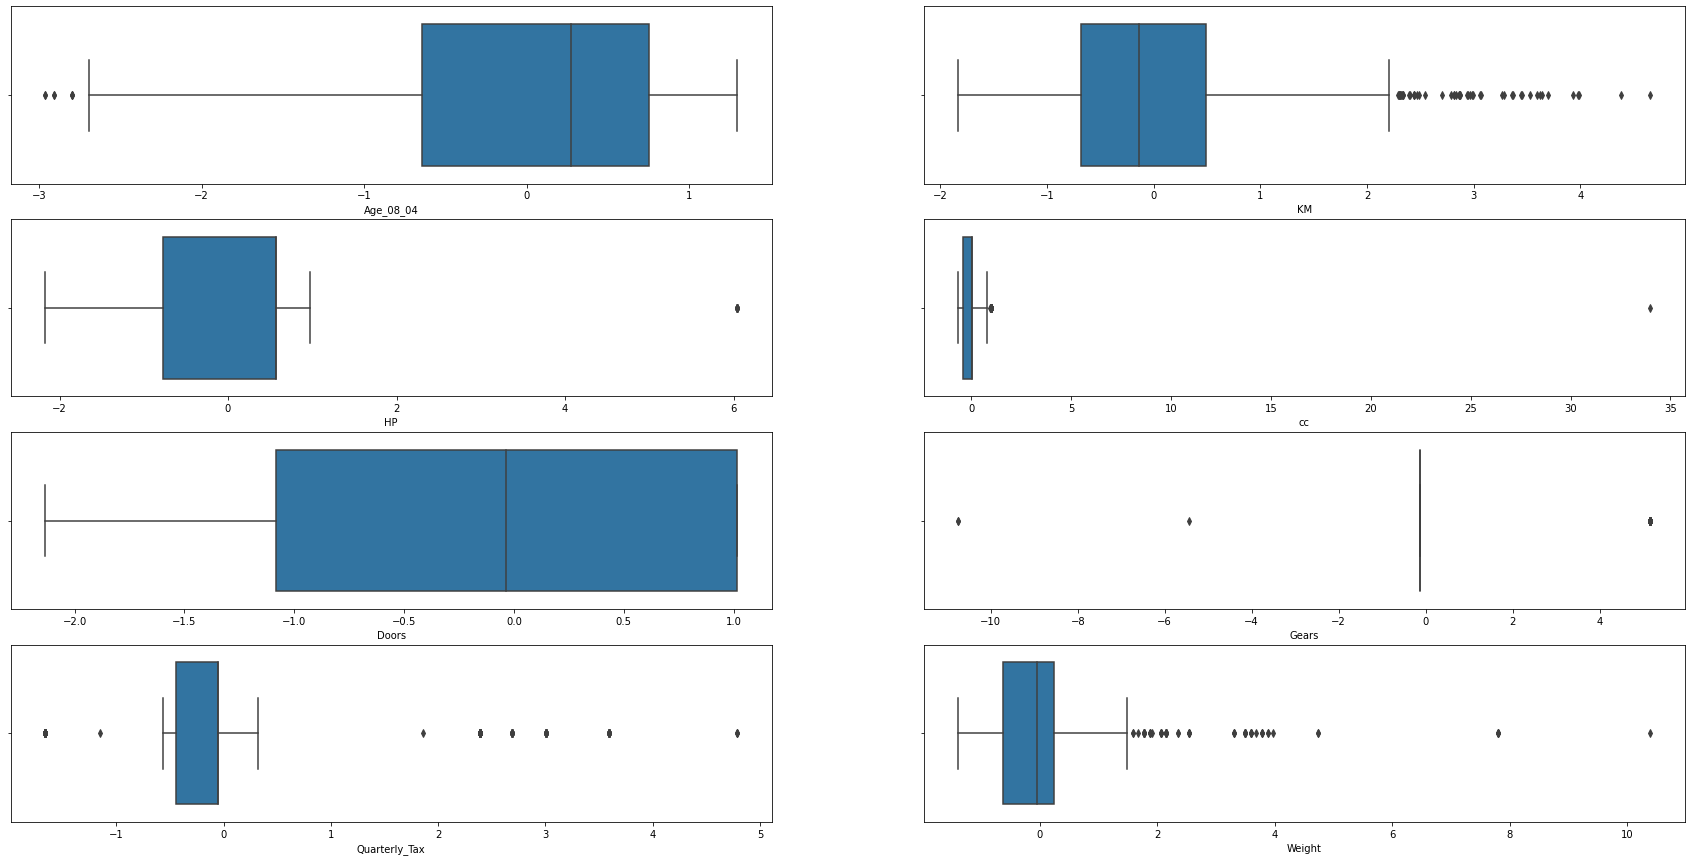

In [110]:
fig,ax=plt.subplots(4,2,figsize=(30,15))
sns.boxplot(df_clean["Age_08_04"],ax=ax[0,0])
sns.boxplot(df_clean["KM"],ax=ax[0,1])
sns.boxplot(df_clean["HP"],ax=ax[1,0])
sns.boxplot(df_clean["cc"],ax=ax[1,1])
sns.boxplot(df_clean["Doors"],ax=ax[2,0])
sns.boxplot(df_clean["Gears"],ax=ax[2,1])
sns.boxplot(df_clean["Quarterly_Tax"],ax=ax[3,0])
sns.boxplot(df_clean["Weight"],ax=ax[3,1])

### Building multiple linear regression

In [111]:
df_clean.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [112]:
model=ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:00:31   Log-Likelihood:                -611.96
No. Observations:                1435   AIC:                             1242.
Df Residuals:                    1426   BIC:                             1289.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.413e-17      0.010  -8.57e-15      1.000      -0.019       0.019
Age_08_04        -0.6261      0.013    -46.552      0.000      -0.652      -0.600
KM               -0.2154      0.013    -16.552      0.000      -0.241      -0.190
HP                0.1311      0.012     11.210      0.000       0.108       0.154
cc               -0.0139      0.011     -1.316      0.188      -0.035       0.007
Doors            -0.0002      0.011     -0.023      0.982      -0.021       0.020
Gears             0.0312      0.010      3.035      0.002       0.011       0.051
Quarterly_Tax     0.0438      0.015      2.944      0.003       0.015       0.073
Weight            0.2441      0.015     15.761      0.000       0.214       0.274
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Testing the model

In [113]:
#model coefficients
model.params

Intercept       -8.413409e-17
Age_08_04       -6.260959e-01
KM              -2.154415e-01
HP               1.311214e-01
cc              -1.394239e-02
Doors           -2.429200e-04
Gears            3.123373e-02
Quarterly_Tax    4.379794e-02
Weight           2.440552e-01
dtype: float64

In [114]:
np.round(model.pvalues,4)#this is the p values

Intercept        1.0000
Age_08_04        0.0000
KM               0.0000
HP               0.0000
cc               0.1882
Doors            0.9816
Gears            0.0025
Quarterly_Tax    0.0033
Weight           0.0000
dtype: float64

In [115]:
#So we see that cc and doors are insignificant because p value> alpha value so this is not significant

In [116]:
model.rsquared, model.rsquared_adj# R^2 and Adjusted R^2

(0.8625200256947, 0.8617487495415146)

In [117]:
#sO THE ACCURACY OF THE MODEL IS 86.17%

#### Now by the help of this variables "cc" and "doors" we have to create a simple and multiple linear regression

In [118]:
model_cc=ols("Price~cc",data=df_clean).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           2.29e-06
Time:                        16:00:31   Log-Likelihood:                -2024.5
No. Observations:                1435   AIC:                             4053.
Df Residuals:                    1433   BIC:                             4064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.939e-18      0.026   2.65e-16      1.000      -0.051       0.051
cc             0.1244      0.026      4.745      0.000       0.073       0.176
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
model_cc.pvalues#So we see that individual effect of adm to the price is significant because its p value<alpha

Intercept    1.000000
cc           0.000002
dtype: float64

In [120]:
model_doors=ols("Price~Doors",data=df_clean).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           2.40e-12
Time:                        16:00:31   Log-Likelihood:                -2011.1
No. Observations:                1435   AIC:                             4026.
Df Residuals:                    1433   BIC:                             4037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.939e-18      0.026   2.67e-16      1.000      -0.051       0.051
Doors          0.1836      0.026      7.071      0.000       0.133       0.235
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
model_doors.pvalues# But here we see p value<alpha so it is individually significant effect

Intercept    1.000000e+00
Doors        2.404166e-12
dtype: float64

In [122]:
model_cc_doors=ols("Price~cc+Doors",data=df_clean).fit()
model_cc_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           2.55e-15
Time:                        16:00:31   Log-Likelihood:                -2002.0
No. Observations:                1435   AIC:                             4010.
Df Residuals:                    1432   BIC:                             4026.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.939e-18      0.026   2.69e-16      1.000      -0.051       0.051
cc             0.1105      0.026      4.268      0.000       0.060       0.161
Doors          0.1748      0.026      6.752      0.000       0.124       0.226
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
model_cc_doors.pvalues# Here if we take both of them then combinely it is significant because p_value<alpha

Intercept    1.000000e+00
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64

## Model validation part

### 1)checking multicollinearity using variance inflation factor(VIF)


In [124]:
df_clean.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [125]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_a=ols('Age_08_04~+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_clean).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_k=ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_clean).fit().rsquared
vif_k=1/(1-rsq_k)

rsq_h=ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_clean).fit().rsquared
vif_h=1/(1-rsq_h)

rsq_c=ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=df_clean).fit().rsquared
vif_c=1/(1-rsq_c)

rsq_d=ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df_clean).fit().rsquared
vif_d=1/(1-rsq_d)

rsq_g=ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=df_clean).fit().rsquared
vif_g=1/(1-rsq_g)

rsq_q=ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Weight',data=df_clean).fit().rsquared
vif_q=1/(1-rsq_q)

rsq_w=ols('Weight~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax',data=df_clean).fit().rsquared
vif_w=1/(1-rsq_w)


# Putting the values in Dataframe format
d1={'Variables':['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],'Vif':[vif_a,vif_k,vif_h,vif_c,vif_d,vif_g,vif_q,vif_w]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.290854
7,Weight,2.486982


### Here all the variables has VIF<20 so all are important

### 2) Residual analysis

#### Residual plot against predicted value

In [126]:
def get_standardised_value(vals):
    return((vals-vals.mean())/(vals.std()))

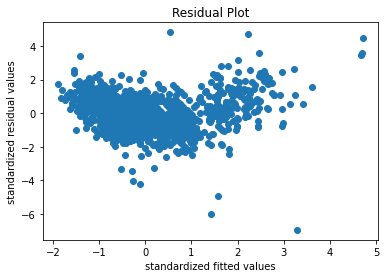

In [127]:
plt.scatter(get_standardised_value(model.fittedvalues),get_standardised_value(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 


#### Residual plot against explanatory variables

In [128]:
df_clean.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

<AxesSubplot:xlabel='cc', ylabel='Price'>

<Figure size 1440x1368 with 0 Axes>

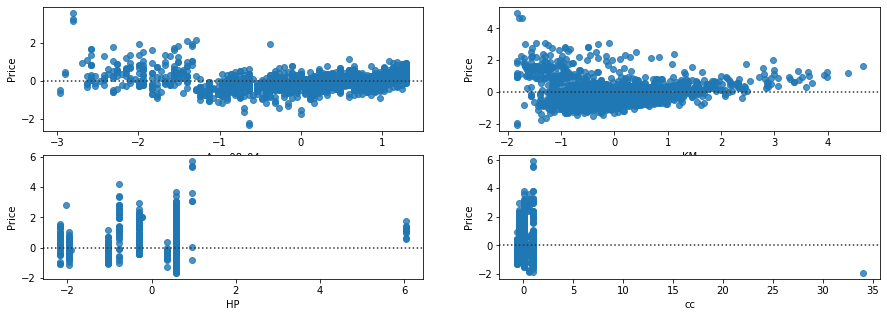

In [129]:
plt.figure(figsize=(20,19))
fig, axs = plt.subplots(2,2,figsize=(15,5))
sns.residplot(df_clean["Age_08_04"],df_clean["Price"],ax=axs[0,0])
sns.residplot(df_clean["KM"],df_clean["Price"],ax=axs[0,1])
sns.residplot(df_clean["HP"],df_clean["Price"],ax=axs[1,0])
sns.residplot(df_clean["cc"],df_clean["Price"],ax=axs[1,1])



<AxesSubplot:xlabel='Weight', ylabel='Price'>

<Figure size 1440x1368 with 0 Axes>

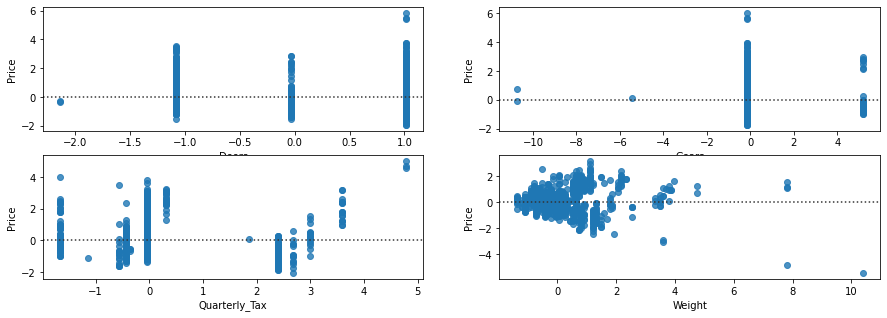

In [130]:
plt.figure(figsize=(20,19))
fig, axs = plt.subplots(2,2,figsize=(15,5))
sns.residplot(df_clean["Doors"],df_clean["Price"],ax=axs[0,0])
sns.residplot(df_clean["Gears"],df_clean["Price"],ax=axs[0,1])
sns.residplot(df_clean["Quarterly_Tax"],df_clean["Price"],ax=axs[1,0])
sns.residplot(df_clean["Weight"],df_clean["Price"],ax=axs[1,1])


### y and fitted vs x

Text(0.5, 1.0, 'y and fitted vs x')

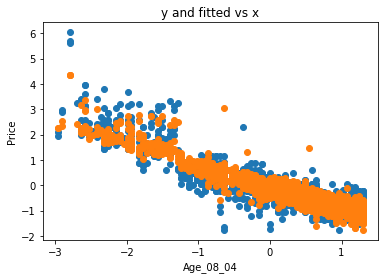

In [131]:
# for Age_08_04
plt.scatter(df_clean["Age_08_04"],df_clean["Price"])
plt.scatter(df_clean["Age_08_04"],model.fittedvalues)
plt.xlabel("Age_08_04")
plt.ylabel("Price")
plt.title("y and fitted vs x")

Text(0.5, 1.0, 'y and fitted vs x')

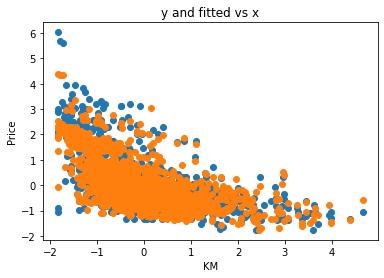

In [132]:
#for KM
plt.scatter(df_clean["KM"],df_clean["Price"])
plt.scatter(df_clean["KM"],model.fittedvalues)
plt.xlabel("KM")
plt.ylabel("Price")
plt.title("y and fitted vs x")

Text(0.5, 1.0, 'y and fitted vs x')

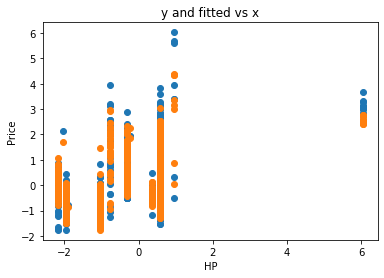

In [133]:
#For HP
plt.scatter(df_clean["HP"],df_clean["Price"])
plt.scatter(df_clean["HP"],model.fittedvalues)
plt.xlabel("HP")
plt.ylabel("Price")
plt.title("y and fitted vs x")

Text(0.5, 1.0, 'y and fitted vs x')

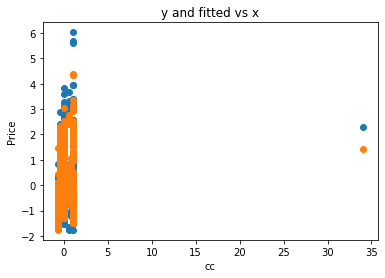

In [134]:
#For cc
plt.scatter(df_clean["cc"],df_clean["Price"])
plt.scatter(df_clean["cc"],model.fittedvalues)
plt.xlabel("cc")
plt.ylabel("Price")
plt.title("y and fitted vs x")

Text(0.5, 1.0, 'y and fitted vs x')

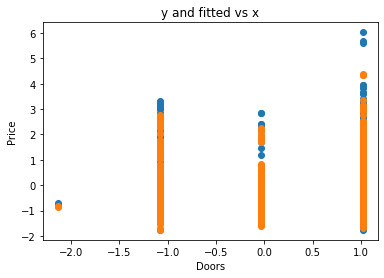

In [135]:
#For Doors
plt.scatter(df_clean["Doors"],df_clean["Price"])
plt.scatter(df_clean["Doors"],model.fittedvalues)
plt.xlabel("Doors")
plt.ylabel("Price")
plt.title("y and fitted vs x")

Text(0.5, 1.0, 'y and fitted vs x')

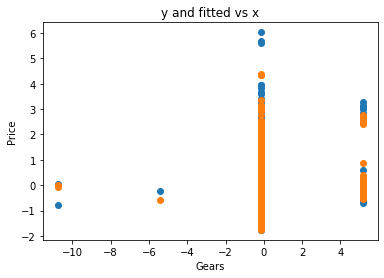

In [136]:
#For Gears
plt.scatter(df_clean["Gears"],df_clean["Price"])
plt.scatter(df_clean["Gears"],model.fittedvalues)
plt.xlabel("Gears")
plt.ylabel("Price")
plt.title("y and fitted vs x")

Text(0.5, 1.0, 'y and fitted vs x')

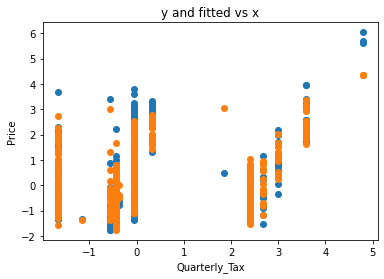

In [137]:
#For Quarterly_Tax
plt.scatter(df_clean["Quarterly_Tax"],df_clean["Price"])
plt.scatter(df_clean["Quarterly_Tax"],model.fittedvalues)
plt.xlabel("Quarterly_Tax")
plt.ylabel("Price")
plt.title("y and fitted vs x")

Text(0.5, 1.0, 'y and fitted vs x')

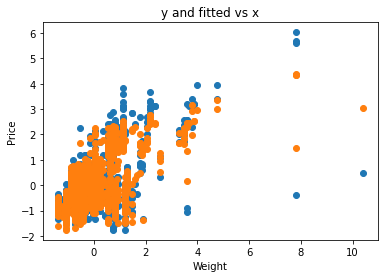

In [138]:
#For Weight
plt.scatter(df_clean["Weight"],df_clean["Price"])
plt.scatter(df_clean["Weight"],model.fittedvalues)
plt.xlabel("Weight")
plt.ylabel("Price")
plt.title("y and fitted vs x")

### Model delition diagnosis

#### Detecting influencers/outliers

*COOKS DISTANCE-Measures the difference between the regression coefficent obtained from the full data and the regression coefficient obtained by deleting the ith observation.
If cooks distance >or = 1 then the point is outliers*

In [139]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

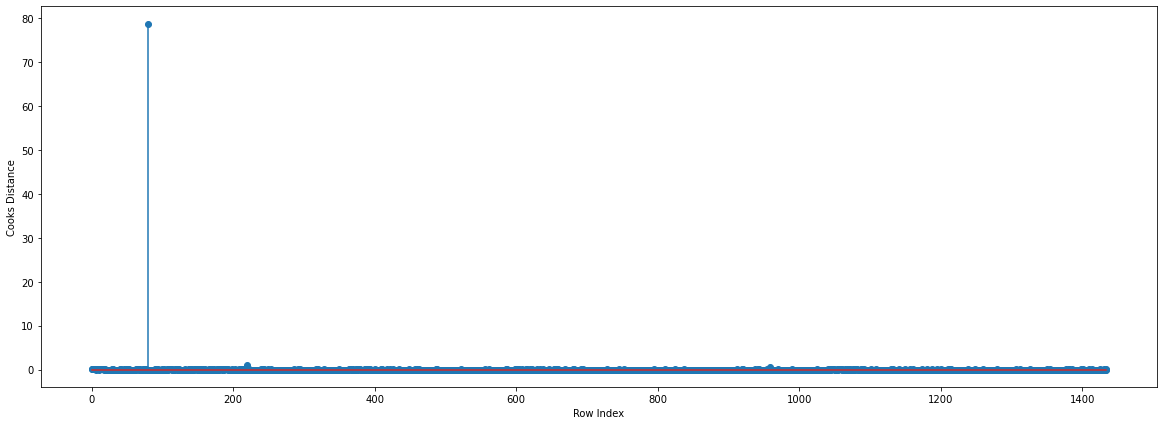

In [140]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df_clean)),np.round(c,4))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

#### Index and value of influencer where c is more that 0.5

In [141]:
(np.argmax(c),np.max(c))#Since 80 index will be remove from the dataset because it is a outlier

(80, 78.72950582259068)

### High influence point

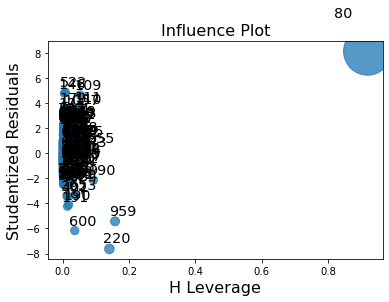

In [142]:
influence_plot(model)
plt.show()# Here we clearly see 49 data point is a outlier

### For leverage cut off
* Leverage value of an observation measure the influence of that observation on the overall fit of the regression function
*Leverage value more than 3(k+1)/n is treated as highly influential observation, where k is the number of features in the model and n is the sample size

In [143]:
k=df_clean.shape[1]
n=df_clean.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [144]:
#IT MEANS ABOVE 0.02 IS THE HIGH INFLUENCE CUT OFF

In [145]:
df_clean[df_clean.index.isin([80])] 

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,2.280325,-1.66891,-1.295048,0.567905,33.986481,1.015305,-0.140426,0.316893,2.061416


In [146]:
 #Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df_clean2=df_clean.drop(df_clean.index[[80]],axis=0).reset_index(drop=True)
df_clean2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.770100,-1.776649,-0.575758,-0.767083,0.997765,-1.084065,-0.140426,3.002466,1.774345
1,0.839376,-1.776649,0.116433,-0.767083,0.997765,-1.084065,-0.140426,3.002466,1.774345
2,0.894797,-1.722779,-0.716458,-0.767083,0.997765,-1.084065,-0.140426,3.002466,1.774345
3,1.171903,-1.615040,-0.548711,-0.767083,0.997765,-1.084065,-0.140426,3.002466,1.774345
4,0.839376,-1.399561,-0.802105,-0.767083,0.997765,-1.084065,-0.140426,3.002466,1.870036
...,...,...,...,...,...,...,...,...,...
1429,-0.892534,0.701357,-1.281045,-1.034081,-0.651671,-1.084065,-0.140426,-0.439951,-0.904984
1430,0.034384,0.862966,-1.322228,-1.034081,-0.651671,-1.084065,-0.140426,-0.439951,-1.096364
1431,-0.615428,0.809097,-1.375147,-1.034081,-0.651671,-1.084065,-0.140426,-0.439951,-1.096364
1432,-0.961810,0.755227,-1.377815,-1.034081,-0.651671,-1.084065,-0.140426,-0.439951,-1.096364


### Build the model again until the cooks_distance <1 and generate R_square

In [150]:
while np.max(c)>0.5 :
        model=ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_clean2).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df_clean2=df_clean2.drop(df_clean2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df_clean2
else:
        final_model=ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_clean2).fit()
        final_model.rsquared , final_model.aic
        print("So the final model accuracy is ",final_model.rsquared)

So the final model accuracy is  0.8882395145171204


## Final model prediction

In [151]:
#Lets take a new data point for the prediction

In [152]:
new_data=pd.DataFrame({'Age_08_04':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Quarterly_Tax":69,"Weight":1012},index=[0])
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12,40000,80,1300,4,5,69,1012


In [153]:
final_model.predict(new_data)

0   -7429.76968
dtype: float64

In [154]:
#And the final model prediction to the dataset which does not contain any outliers data points


### *Dataframe of actual value and predicted value*

In [155]:
predicted_data=pd.DataFrame({"Actual_value":df_clean2["Price"],"Predicted_value":final_model.predict(df_clean2)})
predicted_data

,Actual_value,Predicted_value
0,0.770100,1.558563
1,0.839376,1.431450
2,0.894797,1.553817
3,1.171903,1.461844
4,0.839376,1.430560
...,...,...
1426,-0.892534,-0.432197
1427,0.034384,-0.605427
1428,-0.615428,-0.565125
1429,-0.961810,-0.534051


### R^2 TABLE FOR EACH PROPOSED MODEL

In [156]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.883968
1,Final_Model,0.888240
